In [ ]:
!pip install tensorflow

In [ ]:
!wget 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'


In [ ]:
import zipfile

# Replace 'data.zip' with the actual filename and provide the destination folder

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('destination_folder')

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img

import numpy as np

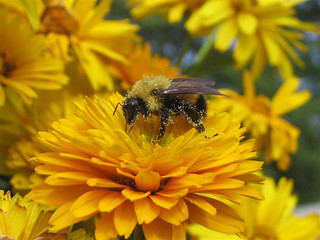

In [3]:
path = './destination_folder/data/train/bee'
name = '2984293_b650d46745_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
train_gen = ImageDataGenerator()

train_ds = train_gen.flow_from_directory(
    './destination_folder/data/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3677 images belonging to 2 classes.


### Question 1: Since we have a binary classification problem, what is the best loss function for us?
### ANS = binary_crossentropy

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
optimizer = optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

### Question 2
### What's the number of parameters in the convolutional layer of our model?
### ANSWER == 896

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './destination_folder/data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './destination_folder/data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [10]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
184/184 [==============================] - 17s 87ms/step - loss: 0.6722 - accuracy: 0.5779 - val_loss: 0.6293 - val_accuracy: 0.6209
Epoch 2/10
184/184 [==============================] - 16s 87ms/step - loss: 0.6373 - accuracy: 0.6309 - val_loss: 0.6194 - val_accuracy: 0.5980
Epoch 3/10
184/184 [==============================] - 16s 87ms/step - loss: 0.5949 - accuracy: 0.6761 - val_loss: 0.5731 - val_accuracy: 0.6917
Epoch 4/10
184/184 [==============================] - 16s 87ms/step - loss: 0.5442 - accuracy: 0.7294 - val_loss: 0.5418 - val_accuracy: 0.7168
Epoch 5/10
184/184 [==============================] - 16s 88ms/step - loss: 0.5137 - accuracy: 0.7558 - val_loss: 0.5603 - val_accuracy: 0.7146
Epoch 6/10
184/184 [==============================] - 16s 87ms/step - loss: 0.4865 - accuracy: 0.7713 - val_loss: 0.5286 - val_accuracy: 0.7571
Epoch 7/10
184/184 [==============================] - 16s 87ms/step - loss: 0.4642 - accuracy: 0.7914 - val_loss: 0.5151 - val_accuracy:

In [11]:
# Getting Model Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [12]:
# Q4 Calculate the accuracy median of training accuracy

accuracy_median = np.median(acc)
print(f"Accuracy Median of Training Accuracy: {accuracy_median:.4f}")

Accuracy Median of Training Accuracy: 0.7635


### Question 3
### What is the median of training accuracy for all the epochs for this model?
### ANSWER == 0.80

In [13]:
# Q4 Calculate the standard deviation of training loss

std_deviation_loss = np.std(loss)
print(f"Standard Deviation of Training Loss: {std_deviation_loss:.4f}")

Standard Deviation of Training Loss: 0.0899


### Question 4
### What is the standard deviation of training loss for all the epochs for this model?
### ANSWER == 0.091

In [14]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

train_ds = train_gen.flow_from_directory(
    './destination_folder/data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './destination_folder/data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [15]:
# MODEL TRAINING WITH AUGMENTATION:

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4945 - accuracy: 0.7577 - val_loss: 0.4903 - val_accuracy: 0.7658
Epoch 2/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4924 - accuracy: 0.7661 - val_loss: 0.4851 - val_accuracy: 0.7778
Epoch 3/10
184/184 [==============================] - 29s 157ms/step - loss: 0.4762 - accuracy: 0.7759 - val_loss: 0.4852 - val_accuracy: 0.7691
Epoch 4/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4721 - accuracy: 0.7822 - val_loss: 0.4910 - val_accuracy: 0.7778
Epoch 5/10
184/184 [==============================] - 29s 157ms/step - loss: 0.4763 - accuracy: 0.7803 - val_loss: 0.5104 - val_accuracy: 0.7495
Epoch 6/10
184/184 [==============================] - 29s 157ms/step - loss: 0.4716 - accuracy: 0.7819 - val_loss: 0.5200 - val_accuracy: 0.7582
Epoch 7/10
184/184 [==============================] - 29s 158ms/step - loss: 0.4664 - accuracy: 0.7852 - val_loss: 0.4766 - val_ac

In [16]:
# Get model parameters

acc_aug = history.history['accuracy']
val_acc_aug = history.history['val_accuracy']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

In [17]:
# MEAN OF VALIDATION LOSS:

loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

print(f"Mean Test Loss: {loss_mean_aug:.4f}")

Mean Test Loss: 0.4942


### QUESTION 5
### what is the mean of test loss for all the epochs for the model trained with augmentations?
### ANSWER == 0.48

In [18]:
# VAL ACCURACY FOR LAST 5 EPOCHS:

val_acc_aug[5:10]

[0.758169949054718,
 0.7886710166931152,
 0.772331178188324,
 0.7603485584259033,
 0.7843137383460999]

In [19]:
# MEAN OF ACCURACY FOR LAST 5 EPOCHE:

acc_mean_aug = np.mean(val_acc_aug[5:10])
print(f"Average Test Accuracy for the last 5 epochs: {acc_mean_aug:.4f}")

Average Test Accuracy for the last 5 epochs: 0.7728


### Question 6
### What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?
### ANSWER == 0.78